Ce programme de Machine Learning a pour but de déterminer les fraudes bancaire à partir du jeux de donné "creditcard"

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
feature = pd.read_csv('creditcard.csv' ,  sep=",")
print(feature)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

Nettoyage & Exploration des donnés

In [2]:
print(feature.info()) #Vérifie qu'il n'ya pas de valeurs manquantes 
print(feature.shape) #Nous donnes la taille de la base de donnée
print(feature.describe()) #Donne les caractéristiques statistiques.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Visualisations & Corrélations des données

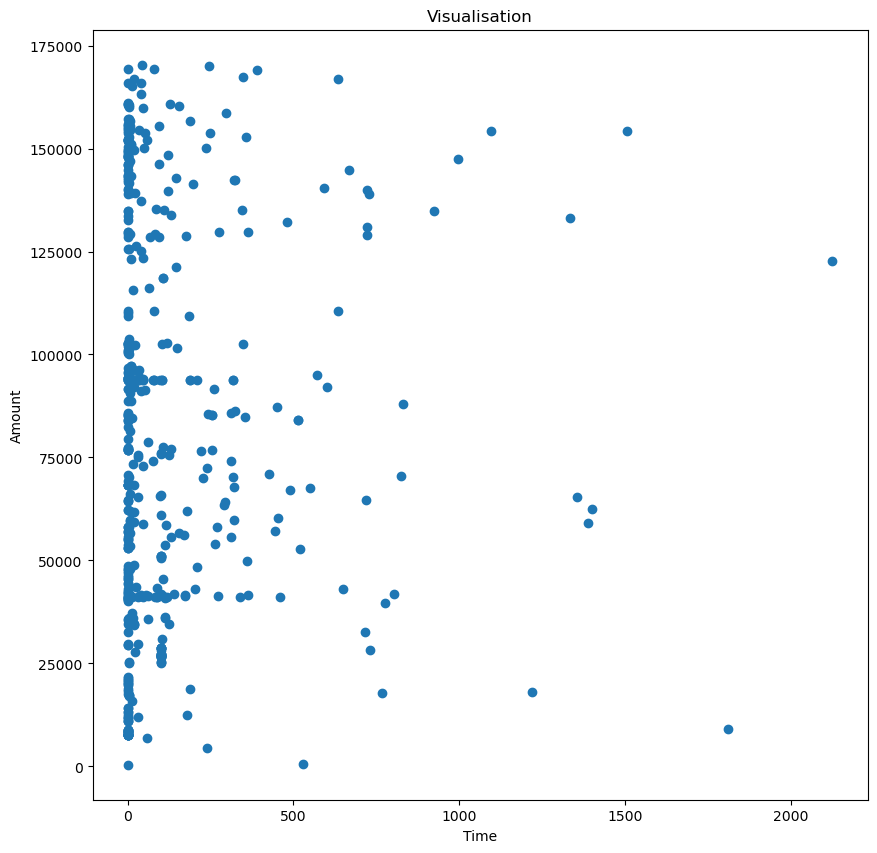

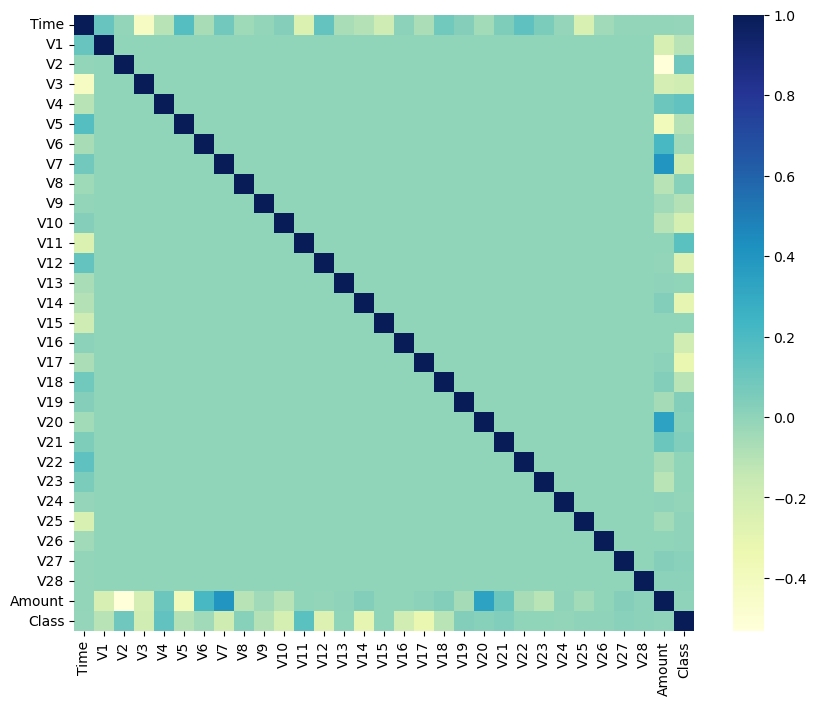

In [ ]:
feature_fraudes = feature[feature.Class== 1] # prend  dans la colonne class  les fraudes (celle ou class==1)
plt.figure(figsize = (10,10))
plt.scatter(feature_fraudes.Amount , feature_fraudes.Time)
plt.title('Visualisation')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

#Matrice de corrélation
corr  = feature.corr()
plt.figure(figsize=(10 , 8))
sns.heatmap( corr ,  cmap ='YlGnBu')
plt.show()



Modélisation 

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


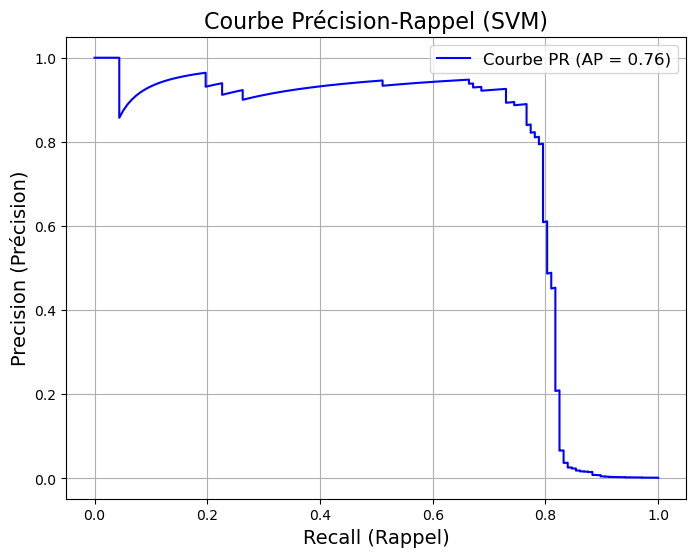

In [2]:
#Séparation des données en valeurs d'entré et valeur de sortie  
y =  np.array(feature['Class'])
x = feature.drop('Class' , axis = 1)
feature_list = list(x.columns)
x = np.array(x)
print(x)
from sklearn import model_selection
from sklearn.metrics import precision_recall_curve, average_precision_score
x_train , x_test ,  y_train , y_test = model_selection.train_test_split(x , y , test_size = 0.3)
from sklearn import  preprocessing
std_scaler = preprocessing.StandardScaler().fit(x_train) # Apprend à standardisé les vecteurs de x pour avoir la meme échelle
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf' , gamma = 0.01)#Noyau gaussien
#Entrainte le classifier sur les jeux de donnée
classifier.fit(x_train_std , y_train)
y_test_pred = classifier.decision_function(x_test_std)#La prédiction se fait sur le jeu de test
#Courbe Précison-rappel
precision , recall , thresholdes  =  precision_recall_curve (y_test , y_test_pred ) # nombre de fraude ; Capacité du modèle à trouver les TP
average_precision = average_precision_score(y_test , y_test_pred ) #Air sous la courbe plus le score est proche de 1 plus le modèle est efficace 

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Courbe PR (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall (Rappel)', fontsize=14)
plt.ylabel('Precision (Précision)', fontsize=14)
plt.title('Courbe Précision-Rappel (SVM)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()









L'axe horizontal Recall permet de savoir parmit les fraudes détecté combien le modèle en a déterminé ;Recall =TP/TP+FN
L'axe vertical permet de savoir parmi les prédictions de fraude faites par le modèle, combien étaient vraiment des fraudes ; Precision = TP/TP
+FP

Mon modèle atteint une average precision (précision moyenne) de 0,84 pour détecter les fraudes bancaires.


Utilisons un autre noyau pour voir